In [1]:
# import spike.spike_analysis.spike_collection as sc
# import spike.spike_analysis.spike_recording as sr
# import spike.spike_analysis.firing_rate_calculations as fr
# import spike.spike_analysis.normalization as norm
# import spike.spike_analysis.single_cell as single_cell
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import behavior.boris_extraction as boris
import matplotlib.pyplot as plt
import behavior.behavioral_epoch_tools as bet
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [2]:
def random_event_generator(start, stop, len_event, no_events):
    total_duration = stop - start
    possible_events = np.arange(int(total_duration / len_event))
    pot_events = np.random.choice(possible_events, size = (no_events), replace = False)
    pot_events = np.sort(pot_events)
    events = []
    for i in pot_events: 
        event_start = (start + (len_event * i)) * 1000
        event_stop = (event_start + (len_event * 1000))
        events.append(np.array([event_start, event_stop]))
    return(np.array(events))

In [3]:
# bar plots of anogenital vs facial sniffing:
# total duration, event length, and number of events, 
# for (exp1 + exp5 combined) vs (exp3 + exp4 combined) for novel condition

behavior_dfs = {}
path = r"C:\Users\zhaoz\Desktop\Research\data\aggregated_csvs"
for file in os.listdir(path):
	if file.endswith(".csv"):
		behavior_dfs[file] = pd.read_csv(os.path.join(path, file))

behavior_dicts = {}
min_bout = 0.3
min_iti = 0.5
subject = ['subject']
behavior = ['anogenital sniffing', 'facial sniffing', 'sniffing object']
order_dict = {'T': 'novel object', 'B': 'familiar object', 'N': 'novel mouse', 'C': 'familiar mouse'}

for filename, df in behavior_dfs.items():
    print(filename)
    mouse_in = list(df[df['Behavior'] == 'mice back in']['Start (s)'])
    mouse_out = list(df[df['Behavior'] == 'mice taken out']['Start (s)'])
    if filename == '23_object_TBCN.csv':
        mouse_in.insert(0, 602)
        mouse_out.insert(0, 900)
        mouse_in.insert(1, 902)
        mouse_out.insert(1, 1201)
    if filename == '32_object_NBTC.csv': 
        mouse_in.insert(1, 922)
        mouse_in.insert(2, 1222)
        mouse_out.insert(1, 1222)
        mouse_out.insert(2,1521)
    if filename == '31_object_BNTC.csv':
        mouse_in.insert(0, 608)
        mouse_in.insert(2, 1213)
        mouse_out.insert(0, 906)
        mouse_out.insert(2,1521)
    df_1 = df[df['Start (s)'] < mouse_out[0]]
    df_2 = df[(df['Start (s)'] > mouse_in[1]) &
            (df['Start (s)'] < mouse_out[1])]
    df_3 = df[(df['Start (s)'] > mouse_in[2]) &
            (df['Start (s)'] < mouse_out[2])]
    df_4 = df[(df['Start (s)'] > mouse_in[3])]
    arrays = []
    arrays.append(boris.get_behavior_bouts(df_1,
                                    subject = subject,
                                    behavior = behavior,
                                    min_bout = min_bout,
                                    min_iti = min_iti))
    arrays.append(boris.get_behavior_bouts(df_2,
                                    subject = subject,
                                    behavior = behavior,
                                    min_bout = min_bout,
                                    min_iti = min_iti))
    arrays.append(boris.get_behavior_bouts(df_3,    
                                    subject = subject,
                                    behavior = behavior,
                                    min_bout = min_bout,
                                    min_iti = min_iti))
    arrays.append(boris.get_behavior_bouts(df_4,        
                                    subject = subject,
                                    behavior = behavior,
                                    min_bout = min_bout,
                                    min_iti = min_iti))
    baseline_array = random_event_generator(0, mouse_in[0], 1, 12)                             
    order = filename.split("_")[-1].split(".")[0]
    behavior_dict = {}
    for i in range(len(order)):
        behavior_dict[f'{order_dict[order[i]]}'] = arrays[i]*1000
    behavior_dict['baseline'] = baseline_array
    behavior_dicts[filename] = behavior_dict

print(behavior_dicts)

22_object_CTBN.csv
23_object_TBCN.csv
31_object_BNTC.csv
32_object_NBTC.csv
41_object_BCNT.csv
44_object_TCNB.csv
{'22_object_CTBN.csv': {'familiar mouse': array([[605400., 606399.],
       [607600., 608866.],
       [609667., 610932.],
       [611867., 612600.],
       [614133., 615067.],
       [616267., 616933.],
       [628200., 632733.],
       [642467., 645066.],
       [677867., 680533.],
       [693933., 696467.],
       [816400., 818267.],
       [877533., 878732.],
       [883200., 885400.],
       [886400., 886867.],
       [904133., 904600.]]), 'novel object': array([[ 921133.,  921933.],
       [ 923067.,  925267.],
       [ 927933.,  929799.],
       [ 933067.,  934000.],
       [ 941867.,  943400.],
       [ 945267.,  947667.],
       [ 959867.,  961400.],
       [ 965200.,  967800.],
       [ 982600.,  983867.],
       [ 992867.,  993533.],
       [1001600., 1002200.],
       [1016333., 1017400.],
       [1034133., 1034733.],
       [1046400., 1048333.],
       [1071933

In [4]:
anogenital_sniffing_dicts = {}
facial_sniffing_dicts = {}
min_bout = 0.3
min_iti = 0.5
subject = ['subject']
order_dict = {'T': 'novel object', 'B': 'familiar object', 'N': 'novel mouse', 'C': 'familiar mouse'}

for filename, df in behavior_dfs.items():
	print(filename)
	mouse_in = list(df[df['Behavior'] == 'mice back in']['Start (s)'])
	mouse_out = list(df[df['Behavior'] == 'mice taken out']['Start (s)'])
	if filename == '23_object_TBCN.csv':
		mouse_in.insert(0, 602)
		mouse_out.insert(0, 900)
		mouse_in.insert(1, 902)
		mouse_out.insert(1, 1201)
	if filename == '32_object_NBTC.csv': 
		mouse_in.insert(1, 922)
		mouse_in.insert(2, 1222)
		mouse_out.insert(1, 1222)
		mouse_out.insert(2,1521)
	if filename == '31_object_BNTC.csv':
		mouse_in.insert(0, 608)
		mouse_in.insert(2, 1213)
		mouse_out.insert(0, 906)
		mouse_out.insert(2,1521)
	df_1 = df[df['Start (s)'] < mouse_out[0]]
	df_2 = df[(df['Start (s)'] > mouse_in[1]) &
            (df['Start (s)'] < mouse_out[1])]
	df_3 = df[(df['Start (s)'] > mouse_in[2]) &
            (df['Start (s)'] < mouse_out[2])]
	df_4 = df[(df['Start (s)'] > mouse_in[3])]
	# anogenital sniffing
	anogenital_sniffing_arrays = []
	anogenital_sniffing_arrays.append(boris.get_behavior_bouts(df_1,
                                    subject = subject,
                                    behavior = ['anogenital sniffing'],
                                    min_bout = min_bout,
                                    min_iti = min_iti))
	anogenital_sniffing_arrays.append(boris.get_behavior_bouts(df_2,
                                    subject = subject,
                                    behavior = ['anogenital sniffing'],
                                    min_bout = min_bout,
                                    min_iti = min_iti))
	anogenital_sniffing_arrays.append(boris.get_behavior_bouts(df_3,    
                                    subject = subject,
                                    behavior = ['anogenital sniffing'],
                                    min_bout = min_bout,
                                    min_iti = min_iti))
	anogenital_sniffing_arrays.append(boris.get_behavior_bouts(df_4,        
                                    subject = subject,
                                    behavior = ['anogenital sniffing'],
                                    min_bout = min_bout,
                                    min_iti = min_iti))
	# facial sniffing
	facial_sniffing_arrays = []
	facial_sniffing_arrays.append(boris.get_behavior_bouts(df_1,
                                    subject = subject,
                                    behavior = ['facial sniffing'],
                                    min_bout = min_bout,
                                    min_iti = min_iti))
	facial_sniffing_arrays.append(boris.get_behavior_bouts(df_2,
                                    subject = subject,
                                    behavior = ['facial sniffing'],
                                    min_bout = min_bout,
                                    min_iti = min_iti))
	facial_sniffing_arrays.append(boris.get_behavior_bouts(df_3,    
                                    subject = subject,
                                    behavior = ['facial sniffing'],
                                    min_bout = min_bout,
                                    min_iti = min_iti))
	facial_sniffing_arrays.append(boris.get_behavior_bouts(df_4,        
                                    subject = subject,
                                    behavior = ['facial sniffing'],
                                    min_bout = min_bout,
                                    min_iti = min_iti))
	baseline_array = random_event_generator(0, mouse_in[0], 1, 12)
	order = filename.split("_")[-1].split(".")[0]
	behavior_dict = {}
	for i in range(len(order)):
		behavior_dict[f'{order_dict[order[i]]}'] = {'anogenital sniffing': anogenital_sniffing_arrays[i]*1000,
													'facial sniffing': facial_sniffing_arrays[i]*1000}
	behavior_dict['baseline'] = baseline_array
	behavior_dicts[filename] = behavior_dict

print(behavior_dicts)
#for value in behavior_dicts.values():
#	print(value['familiar mouse'])
#	print(value['novel mouse'])

22_object_CTBN.csv
23_object_TBCN.csv
31_object_BNTC.csv
32_object_NBTC.csv
41_object_BCNT.csv
44_object_TCNB.csv
{'22_object_CTBN.csv': {'familiar mouse': {'anogenital sniffing': array([[605400., 606399.],
       [607600., 608866.],
       [609667., 610932.],
       [611867., 612600.],
       [614133., 614532.],
       [616267., 616933.],
       [630933., 632733.],
       [643933., 645066.],
       [678400., 680533.],
       [696000., 696467.],
       [816400., 818267.],
       [884133., 885400.],
       [886400., 886867.],
       [904133., 904600.]]), 'facial sniffing': array([[614533., 615067.],
       [628200., 630932.],
       [642467., 643932.],
       [677867., 678399.],
       [693933., 695999.],
       [877533., 878732.],
       [883200., 884132.]])}, 'novel object': {'anogenital sniffing': array([], shape=(0, 2), dtype=float64), 'facial sniffing': array([], shape=(0, 2), dtype=float64)}, 'familiar object': {'anogenital sniffing': array([], shape=(0, 2), dtype=float64), 'facia

In [73]:
conditions = ['familiar mouse', 'novel mouse']
behaviors = ['anogenital sniffing', 'facial sniffing']
total_duration = {}
aver_event_length = {}
n_o_events = {}

fam_ano_event_length = []
fam_fac_event_length = []
nov_ano_event_length = []
nov_fac_event_length = []

for recording, behavior_dict in behavior_dicts.items():
	#print(recording)
	#print(behavior_dict[conditions[0]][behaviors[0]].shape)
	rec_fam_ano_event_length = []
	for event in behavior_dict[conditions[0]][behaviors[0]]:
		rec_fam_ano_event_length.append((event[1] - event[0])/1000)
	fam_ano_event_length.append(rec_fam_ano_event_length)

	rec_fam_fac_event_length = []
	for event in behavior_dict[conditions[0]][behaviors[1]]:
		rec_fam_fac_event_length.append((event[1] - event[0])/1000)
	fam_fac_event_length.append(rec_fam_fac_event_length)

	rec_nov_ano_event_length = []
	for event in behavior_dict[conditions[1]][behaviors[0]]:
		rec_nov_ano_event_length.append((event[1] - event[0])/1000)
	nov_ano_event_length.append(rec_nov_ano_event_length)

	rec_nov_fac_event_length = []
	for event in behavior_dict[conditions[1]][behaviors[1]]:
		rec_nov_fac_event_length.append((event[1] - event[0])/1000)
	nov_fac_event_length.append(rec_nov_fac_event_length)
	
fam_ano_total_time = [sum(event) if event else 0 for event in fam_ano_event_length]
fam_fac_total_time = [sum(event) if event else 0 for event in fam_fac_event_length]
nov_ano_total_time = [sum(event) if event else 0 for event in nov_ano_event_length]
nov_fac_total_time = [sum(event) if event else 0 for event in nov_fac_event_length]

mean_total_duration = {'anogenital sniffing': (np.mean(fam_ano_total_time), np.mean(nov_ano_total_time)),
						'facial sniffing': (np.mean(fam_fac_total_time), np.mean(nov_fac_total_time))}
sem_total_duration = {'anogenital sniffing': [stats.sem(fam_ano_total_time), stats.sem(nov_ano_total_time)],
						'facial sniffing': [stats.sem(fam_fac_total_time), stats.sem(nov_fac_total_time)]}

fam_ano_aver_time = [sum(event)/len(event) if event else 0 for event in fam_ano_event_length]
fam_fac_aver_time = [sum(event)/len(event) if event else 0 for event in fam_fac_event_length]
nov_ano_aver_time = [sum(event)/len(event) if event else 0 for event in nov_ano_event_length]
nov_fac_aver_time = [sum(event)/len(event) if event else 0 for event in nov_fac_event_length]

mean_aver_time = {'anogenital sniffing': (np.mean(fam_ano_aver_time), np.mean(nov_ano_aver_time)),
						'facial sniffing': (np.mean(fam_fac_aver_time), np.mean(nov_fac_aver_time))}
sem_aver_time = {'anogenital sniffing': [stats.sem(fam_ano_aver_time), stats.sem(nov_ano_aver_time)],
						'facial sniffing': [stats.sem(fam_fac_aver_time), stats.sem(nov_fac_aver_time)]}

fam_ano_n_o_event = [len(event) if event else 0 for event in fam_ano_event_length]
fam_fac_n_o_event = [len(event) if event else 0 for event in fam_fac_event_length]
nov_ano_n_o_event = [len(event) if event else 0 for event in nov_ano_event_length]
nov_fac_n_o_event = [len(event) if event else 0 for event in nov_fac_event_length]

mean_n_o_event = {'anogenital sniffing': (np.mean(fam_ano_n_o_event), np.mean(nov_ano_n_o_event)),
						'facial sniffing': (np.mean(fam_fac_n_o_event), np.mean(nov_fac_n_o_event))}
sem_n_o_event = {'anogenital sniffing': [stats.sem(fam_ano_n_o_event), stats.sem(nov_ano_n_o_event)],
						'facial sniffing': [stats.sem(fam_fac_n_o_event), stats.sem(nov_fac_n_o_event)]}

print("fam_ano_event_length:", fam_ano_total_time)
print("fam_fac_event_length:", fam_fac_total_time)
print("nov_ano_event_length:", nov_ano_total_time)
print("nov_fac_event_length:", nov_fac_total_time)


fam_ano_event_length: [np.float64(14.928999999999998), np.float64(2.601), 0, np.float64(61.465), np.float64(59.905), np.float64(42.332)]
fam_fac_event_length: [np.float64(9.46), np.float64(0.4), np.float64(0.8), np.float64(5.734), np.float64(20.740999999999882), np.float64(14.932)]
nov_ano_event_length: [np.float64(27.112999999999996), np.float64(17.466), np.float64(7.000000000000001), np.float64(42.333), np.float64(17.744), np.float64(28.533)]
nov_fac_event_length: [np.float64(25.194999999999997), np.float64(23.065), np.float64(8.467), np.float64(15.133), np.float64(21.762000000000004), np.float64(16.534000000000002)]


In [76]:

def plot_ano_vs_fac(means, sems, ylabel, title, conditions, behaviors):
	x = np.arange(len(conditions))
	width = 0.35
	multiplier = 0

	fig, ax = plt.subplots(layout = 'constrained')

	for behavior in behaviors:
		offset = width*multiplier
		rects = ax.bar(x + offset, means[behavior], width, yerr = sems[behavior], label = behavior)
		ax.bar_label(rects, padding = 3)
		multiplier += 1

	ax.set_ylabel(ylabel)
	ax.set_title(title)
	ax.set_xticks(x + width/2, conditions)
	ax.legend()
	plt.show()


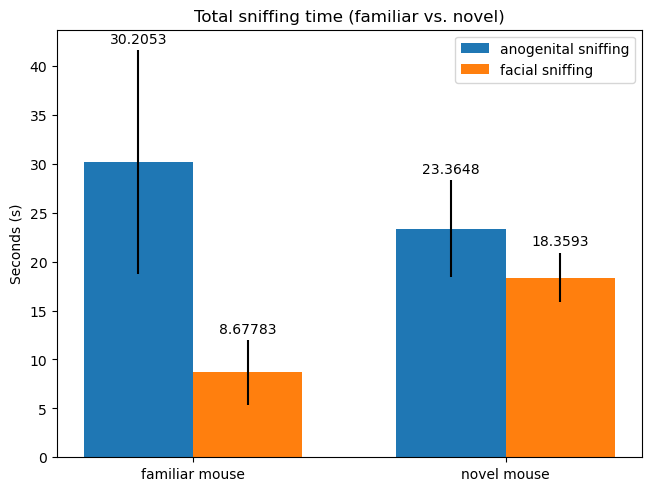

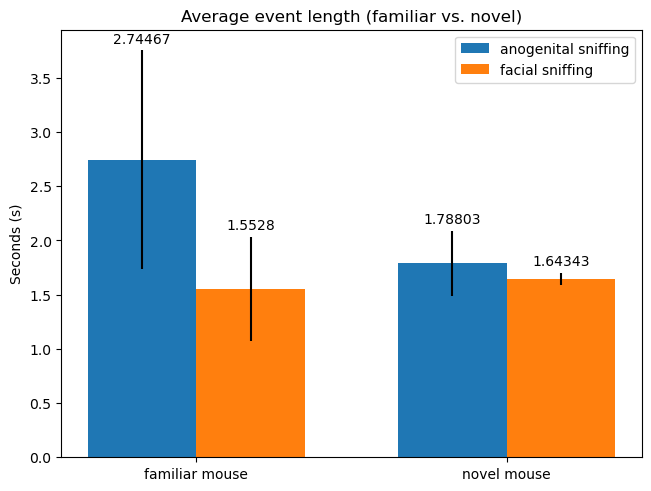

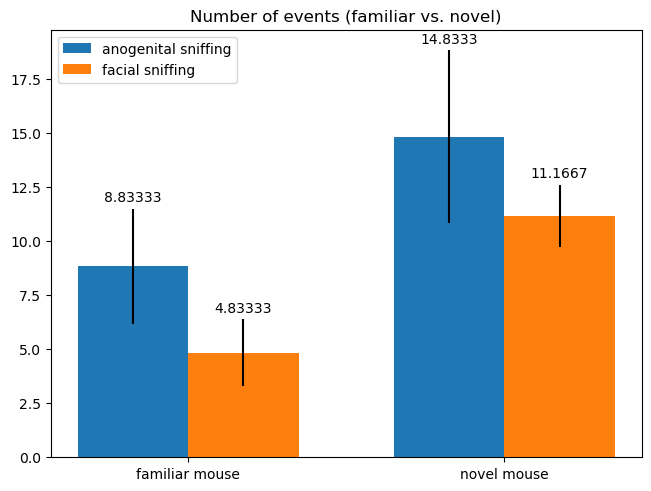

In [ ]:
plot_ano_vs_fac(mean_total_duration, sem_total_duration, 'Seconds (s)', 'Total sniffing time (familiar vs. novel)', conditions, behaviors)

plot_ano_vs_fac(mean_aver_time, sem_aver_time, 'Seconds (s)', 'Average event length (familiar vs. novel)', conditions, behaviors)

plot_ano_vs_fac(mean_n_o_event, sem_n_o_event, '', 'Number of events (familiar vs. novel)', conditions, behaviors)